In [294]:
import pandas as pd
import matplotlib as plt 
import seaborn as sns 
import numpy as np

In [295]:
df_weather_all = pd.read_csv('CBS_2021-2023_Daily_Weather.csv')

In [296]:
df_weather_all['Date'] = pd.to_datetime(df_weather_all['Date'])


df_weather_2021 = df_weather_all[df_weather_all['Date'].dt.year == 2021]

df_weather_2022 = df_weather_all[df_weather_all['Date'].dt.year == 2022]

df_weather_2023 = df_weather_all[df_weather_all['Date'].dt.year == 2023]

In [297]:
df_weather_all.shape

(1095, 8)

In [298]:
df_weather_all.columns

Index(['Casual', 'Date', 'Member', 'Total_rides',
       'apparent_temperature_mean (°C)', 'temperature_2m_mean (°C)',
       'weathercode (wmo code)', 'windspeed_10m_max (km/h)'],
      dtype='object')

In [299]:
unique_weather_codes = df_weather_all['weathercode (wmo code)'].unique()

print("Number of unique weather codes:", len(unique_weather_codes))

Number of unique weather codes: 13


In [300]:
print("Unique weather codes:", unique_weather_codes)

Unique weather codes: [63 61  3 51  2  1  0 53 73 71 75 55 65]


In [301]:
# Function to categorize weather codes
def categorize_weather_code(code):
    if code == 0:
        return 'clear'
    elif 1 <= code <= 3:
        return 'cloudy'
    elif 51 <= code <= 55:
        return 'drizzle'
    elif 61 <= code <= 65:
        return 'rain'
    elif 71 <= code <= 75:
        return 'snow'
    else:
        return 'unknown'  # For any code that doesn't match the given categories

# Apply the function to create the new column
df_weather_all['weather_condition'] = df_weather_all['weathercode (wmo code)'].apply(categorize_weather_code)

# This will print the first few rows of the DataFrame to verify the new column
print(df_weather_all.head())

   Casual       Date  Member  Total_rides  apparent_temperature_mean (°C)  \
0     371 2021-01-01     590          961                            -0.9   
1    2874 2021-01-02    2844         5718                             4.8   
2     495 2021-01-03    1133         1628                             0.9   
3     907 2021-01-04    2074         2981                             1.0   
4    1057 2021-01-05    2004         3061                             1.4   

   temperature_2m_mean (°C)  weathercode (wmo code)  windspeed_10m_max (km/h)  \
0                       2.3                      63                      10.6   
1                       7.6                      61                      19.1   
2                       3.9                      63                      13.0   
3                       4.1                       3                      13.3   
4                       4.0                      51                       9.2   

  weather_condition  
0              rain  
1     

In [302]:
# Function to categorize weather codes
def categorize_weather_code(code):
    if code == 0:
        return 'clear'
    elif 1 <= code <= 3:
        return 'cloudy'
    elif 51 <= code <= 55:
        return 'drizzle'
    elif 61 <= code <= 65:
        return 'rain'
    elif 71 <= code <= 75:
        return 'snow'
    else:
        return 'unknown'  # For any code that doesn't match the given categories

# Apply the function to create the new column
df_weather_2023['weather_condition'] = df_weather_2023['weathercode (wmo code)'].apply(categorize_weather_code)



/var/folders/5j/htw13d2n7_n_y8tsmfkw1cdm0000gn/T/ipykernel_6118/2726741059.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather_2023['weather_condition'] = df_weather_2023['weathercode (wmo code)'].apply(categorize_weather_code)


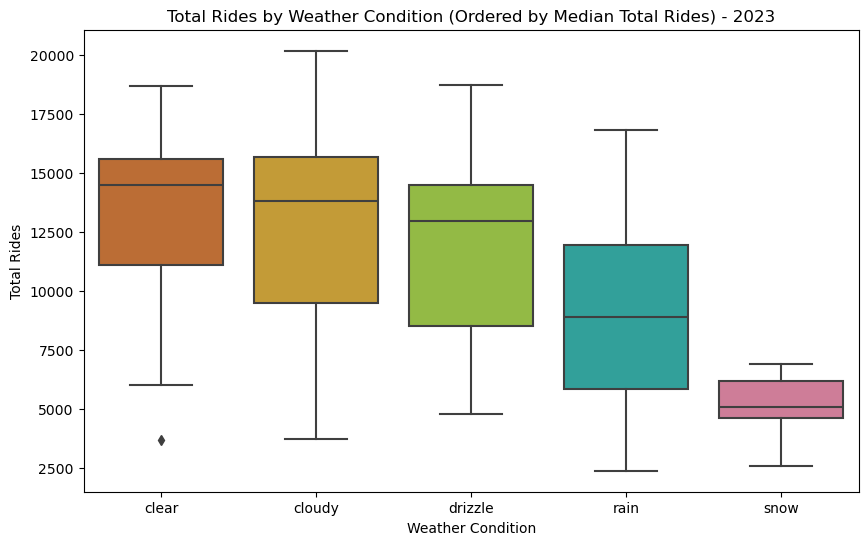

In [303]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_weather_2023 is your DataFrame

# Calculate median Total_rides for each weather_condition
median_total_rides = df_weather_2023.groupby('weather_condition')['Total_rides'].median().sort_values(ascending=False)

# Get the weather_condition in descending order of their median Total_rides
order = median_total_rides.index

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Define a palette that maps each weather_condition to a color
colors = ['chocolate', 'goldenrod', 'yellowgreen', 'lightseagreen', 'palevioletred']
palette = {condition: color for condition, color in zip(order, colors)}

# Create the box plot with ordered weather_condition categories and custom palette
sns.boxplot(x='weather_condition', y='Total_rides', data=df_weather_2023, order=order, palette=palette)

# Set the title and labels of the plot
plt.title('Total Rides by Weather Condition (Ordered by Median Total Rides) - 2023')
plt.xlabel('Weather Condition')
plt.ylabel('Total Rides')

# Display the plot
plt.show()


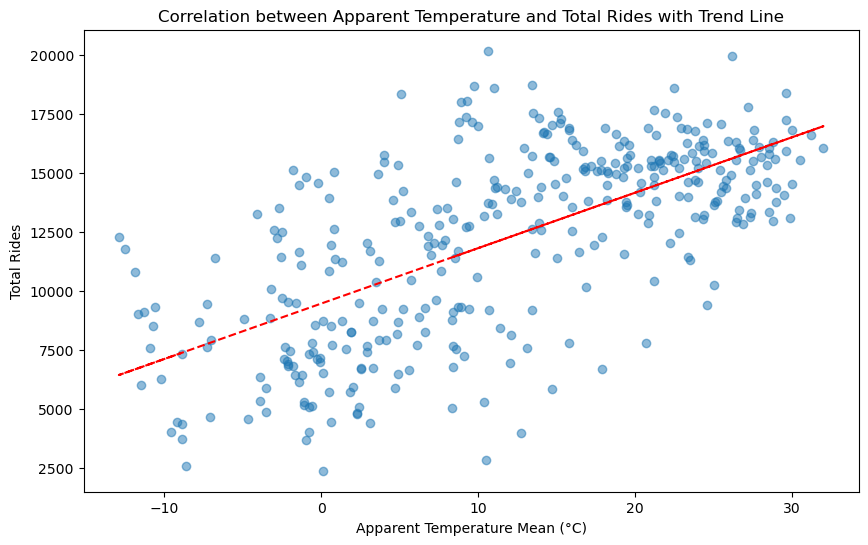

In [304]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_weather_2023 is your DataFrame

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_weather_2023['apparent_temperature_mean (°C)'], df_weather_2023['Total_rides'], alpha=0.5)

# Calculate the trend line
z = np.polyfit(df_weather_2023['apparent_temperature_mean (°C)'], df_weather_2023['Total_rides'], 1)
p = np.poly1d(z)

# Add the trend line to the plot
plt.plot(df_weather_2023['apparent_temperature_mean (°C)'], p(df_weather_2023['apparent_temperature_mean (°C)']), "r--")
# The "r--" argument specifies a red dashed line

# Title and labels
plt.title('Correlation between Apparent Temperature and Total Rides with Trend Line')
plt.xlabel('Apparent Temperature Mean (°C)')
plt.ylabel('Total Rides')

# Show the plot
plt.show()


## Apparent Temperature vs. Total Rides - 2023

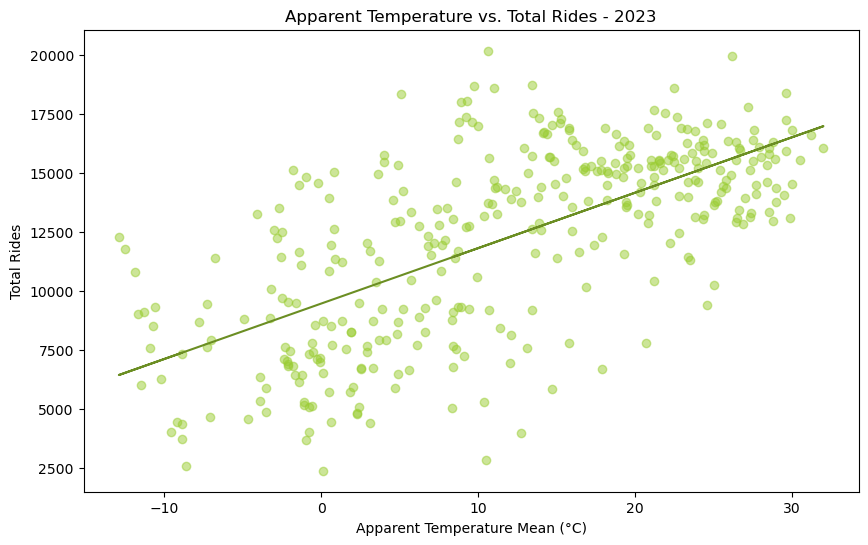

In [305]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_weather_2023 is your DataFrame

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_weather_2023['apparent_temperature_mean (°C)'], df_weather_2023['Total_rides'], alpha=0.5, color='yellowgreen')

# Calculate the trend line
z = np.polyfit(df_weather_2023['apparent_temperature_mean (°C)'], df_weather_2023['Total_rides'], 1)
p = np.poly1d(z)

# Add the trend line to the plot
plt.plot(df_weather_2023['apparent_temperature_mean (°C)'], p(df_weather_2023['apparent_temperature_mean (°C)']), color='olivedrab')
# Specified the color as 'darkorange'

# Title and labels
plt.title('Apparent Temperature vs. Total Rides - 2023')
plt.xlabel('Apparent Temperature Mean (°C)')
plt.ylabel('Total Rides')

# Show the plot
plt.show()


## Apparent Temperature vs. Total Rides with Trend Line - 2022

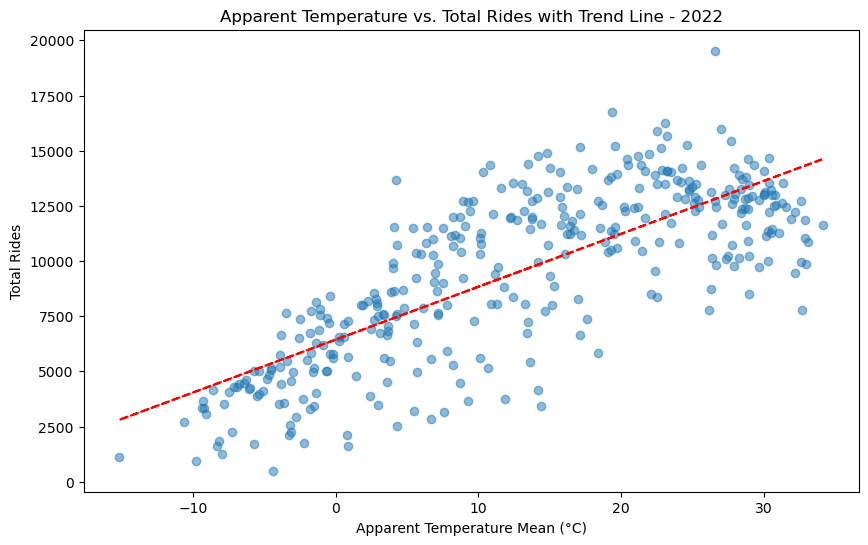

In [306]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_weather_2022 is your DataFrame

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_weather_2022['apparent_temperature_mean (°C)'], df_weather_2022['Total_rides'], alpha=0.5)

# Calculate the trend line
z = np.polyfit(df_weather_2022['apparent_temperature_mean (°C)'], df_weather_2022['Total_rides'], 1)
p = np.poly1d(z)

# Add the trend line to the plot
plt.plot(df_weather_2022['apparent_temperature_mean (°C)'], p(df_weather_2022['apparent_temperature_mean (°C)']), "r--")
# The "r--" argument specifies a red dashed line

# Title and labels
plt.title('Apparent Temperature vs. Total Rides with Trend Line - 2022')
plt.xlabel('Apparent Temperature Mean (°C)')
plt.ylabel('Total Rides')

# Show the plot
plt.show()


## Temperature vs. Total Rides with Trend Line - 2021

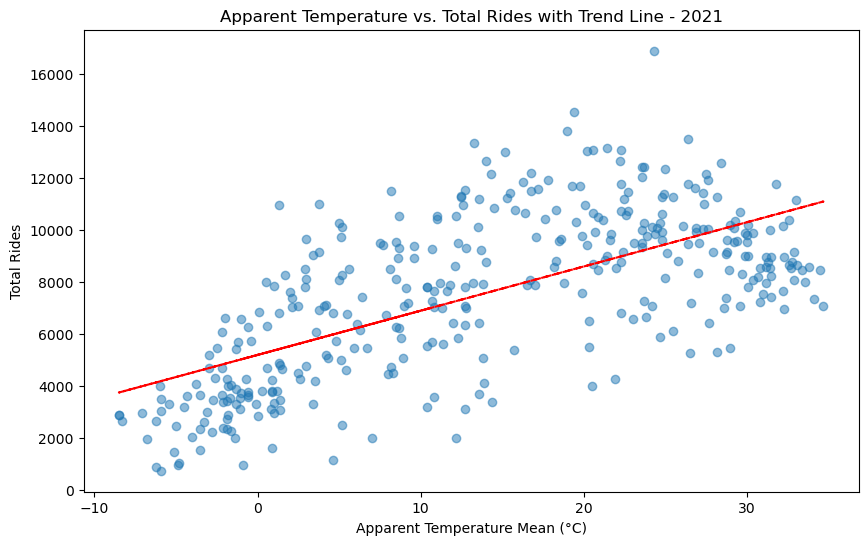

In [307]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming df_weather_2021 is your DataFrame

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_weather_2021['apparent_temperature_mean (°C)'], df_weather_2021['Total_rides'], alpha=0.5)

# Calculate the trend line
z = np.polyfit(df_weather_2021['apparent_temperature_mean (°C)'], df_weather_2021['Total_rides'], 1)
p = np.poly1d(z)

# Add the trend line to the plot
plt.plot(df_weather_2021['apparent_temperature_mean (°C)'], p(df_weather_2021['apparent_temperature_mean (°C)']), "r--")
# The "r--" argument specifies a red dashed line

# Title and labels
plt.title('Apparent Temperature vs. Total Rides with Trend Line - 2021')
plt.xlabel('Apparent Temperature Mean (°C)')
plt.ylabel('Total Rides')

# Show the plot
plt.show()


## Calculation Slope Trend Lines

In [308]:
import numpy as np
import pandas as pd

# Assuming df_weather_2021 and df_weather_2021 are your DataFrames for 2020 and 2021, respectively

# Compute the slope and intercept for 2021
z_2021 = np.polyfit(df_weather_2021['apparent_temperature_mean (°C)'], df_weather_2021['Total_rides'], 1)
slope_2021, intercept_2021 = z_2021

# Compute the slope and intercept for 2022
z_2022 = np.polyfit(df_weather_2022['apparent_temperature_mean (°C)'], df_weather_2022['Total_rides'], 1)
slope_2022, intercept_2022 = z_2022

# Compute the slope and intercept for 2023
z_2023 = np.polyfit(df_weather_2023['apparent_temperature_mean (°C)'], df_weather_2023['Total_rides'], 1)
slope_2023, intercept_2023 = z_2023

# Print the slopes to compare
print(f"Slope for 2021: {slope_2021}")
print(f"Slope for 2022: {slope_2022}")
print(f"Slope for 2023: {slope_2023}")





Slope for 2021: 169.9033978423675
Slope for 2022: 239.56525967457105
Slope for 2023: 234.9536458295038


In [309]:
df_weather_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int64         
 1   Date                            1095 non-null   datetime64[ns]
 2   Member                          1095 non-null   int64         
 3   Total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean (°C)  1095 non-null   float64       
 5   temperature_2m_mean (°C)        1095 non-null   float64       
 6   weathercode (wmo code)          1095 non-null   int64         
 7   windspeed_10m_max (km/h)        1095 non-null   float64       
 8   weather_condition               1095 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 77.1+ KB


In [310]:
df_weather_select = df_weather_all[["Total_rides", "apparent_temperature_mean (°C)", "weathercode (wmo code)", "windspeed_10m_max (km/h)" ]].rename(columns={"Total_rides": "rides", "apparent_temperature_mean (°C)": "temperature", "weathercode (wmo code)": "weathercode", "windspeed_10m_max (km/h)": "windspeed"})


In [311]:
df_weather_select.shape

(1095, 4)

In [312]:
df_weather_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rides        1095 non-null   int64  
 1   temperature  1095 non-null   float64
 2   weathercode  1095 non-null   int64  
 3   windspeed    1095 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 34.3 KB


In [313]:
temperature_rides = df_weather_select [["temperature", "rides"]]
display(temperature_rides.head())
display(temperature_rides.shape)

,temperature,rides
0,-0.9,961
1,4.8,5718
2,0.9,1628
3,1.0,2981
4,1.4,3061


(1095, 2)

In [314]:
weathercode_rides = df_weather_select [["weathercode", "rides"]]
display(weathercode_rides.head())
display(weathercode_rides.shape)

,weathercode,rides
0,63,961
1,61,5718
2,63,1628
3,3,2981
4,51,3061


(1095, 2)

In [315]:
windspeed_rides = df_weather_select [["windspeed", "rides"]]
display(windspeed_rides.head())
display(windspeed_rides.shape)

,windspeed,rides
0,10.6,961
1,19.1,5718
2,13.0,1628
3,13.3,2981
4,9.2,3061


(1095, 2)

In [316]:
temperature = df_weather_select["temperature"] 
weathercode = df_weather_select["weathercode"]
windspeed = df_weather_select ["windspeed"]
rides = df_weather_select["rides"] 

print(temperature.shape)
print(weathercode.shape)
print()
print(rides.shape)

(1095,)
(1095,)

(1095,)


In [317]:
from sklearn.linear_model import LinearRegression

In [318]:
weathercode = weathercode_rides["weathercode"].to_numpy().reshape(-1, 1)
windspeed = windspeed_rides["windspeed"].to_numpy().reshape(-1, 1)
temperature = temperature_rides["temperature"].to_numpy().reshape(-1, 1)
rides = temperature_rides["rides"].to_numpy().reshape(-1, 1)

print(temperature.shape)
print(weathercode.shape)
print(windspeed.shape)
print(rides.shape)


(1095, 1)
(1095, 1)
(1095, 1)
(1095, 1)


## Linear Model for Temperature 

In [319]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [320]:
temperature_train, temperature_test, rides_train, rides_test = train_test_split(temperature, rides, test_size=0.2, random_state=0)

reg_temp = linear_model.LinearRegression()
reg_temp.fit(temperature_train, rides_train)

reg_temp_score = (reg_temp.score(temperature_test, rides_test) * 100).round(2)
print("The accuracy of the ML model based on temperature is", reg_temp_score , "%")
#weathercode_train, weathercode_test, windspeed_train, windspeed_test

The accuracy of the ML model based on temperature is 33.04 %


In [321]:
temperature_pred = 20

pred_1 = reg_temp.predict([[temperature_pred]]) 

print(f"At the temperature of {temperature_pred}°C the amount of rides may be {pred_1} and is {reg_temp_score}% accurate" )

At the temperature of 20°C the amount of rides may be [[11069.46468586]] and is 33.04% accurate


In [322]:
weathercode_dummies = pd.get_dummies(df_weather_select['weathercode'], prefix='weathercode')


print(weathercode_dummies.head())

   weathercode_0  weathercode_1  weathercode_2  weathercode_3  weathercode_51  \
0          False          False          False          False           False   
1          False          False          False          False           False   
2          False          False          False          False           False   
3          False          False          False           True           False   
4          False          False          False          False            True   

   weathercode_53  weathercode_55  weathercode_61  weathercode_63  \
0           False           False           False            True   
1           False           False            True           False   
2           False           False           False            True   
3           False           False           False           False   
4           False           False           False           False   

   weathercode_65  weathercode_71  weathercode_73  weathercode_75  
0           False           Fa

## Linear Regression with Dummies for weathercode

In [323]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


weathercode_dummies = pd.get_dummies(df_weather_select['weathercode'], prefix='weathercode')
df_encoded = pd.concat([df_weather_select.drop('weathercode', axis=1), weathercode_dummies], axis=1)


X = df_encoded.drop('rides', axis=1)
y = df_encoded['rides']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model = linear_model.LinearRegression()
model.fit(X_train, y_train)


score = model.score(X_test, y_test)

print(f"The accuracy of the ML model based on one-hot encoded weathercode is {score * 100:.2f}%")


The accuracy of the ML model based on one-hot encoded weathercode is 52.12%


## Feature vector with specific Temperature

In [324]:

feature_vector = {col: 0 for col in X_train.columns}

# Update the dictionary for the specific weather code you want to test
feature_vector['weathercode_75'] = 1

# Convert the dictionary to a DataFrame because `predict` expects a 2D array-like structure
import pandas as pd
df_test = pd.DataFrame([feature_vector])

# Predict
pred_1 = model.predict(df_test)

print(f"With wmo 73 the amount of rides may be {pred_1[0]:.2f} and is {score * 100:.2f}% accurate")


With wmo 73 the amount of rides may be 2149.30 and is 52.12% accurate


In [325]:
# Initialize the feature vector with zeros for all dummy variables
feature_vector = {col: 0 for col in X_train.columns}

# Set the specific weather code to 1
feature_vector['weathercode_73'] = 1

# Add your additional features with their respective test values
feature_vector['temperature'] = 25  # Replace test_temperature with your test value
feature_vector['windspeed'] = 10     # Replace test_windspeed with your test value

# Convert the feature vector to a DataFrame
df_test = pd.DataFrame([feature_vector])

# Make the prediction
pred_1 = model.predict(df_test)

print(f"With wmo 73, temperature {25}, and windspeed {10}, the amount of rides may be {pred_1[0]:.2f} and is {score * 100:.2f}% accurate")


With wmo 73, temperature 25, and windspeed 10, the amount of rides may be 9200.23 and is 52.12% accurate


# Heatmap weather conditions for Rides prediction

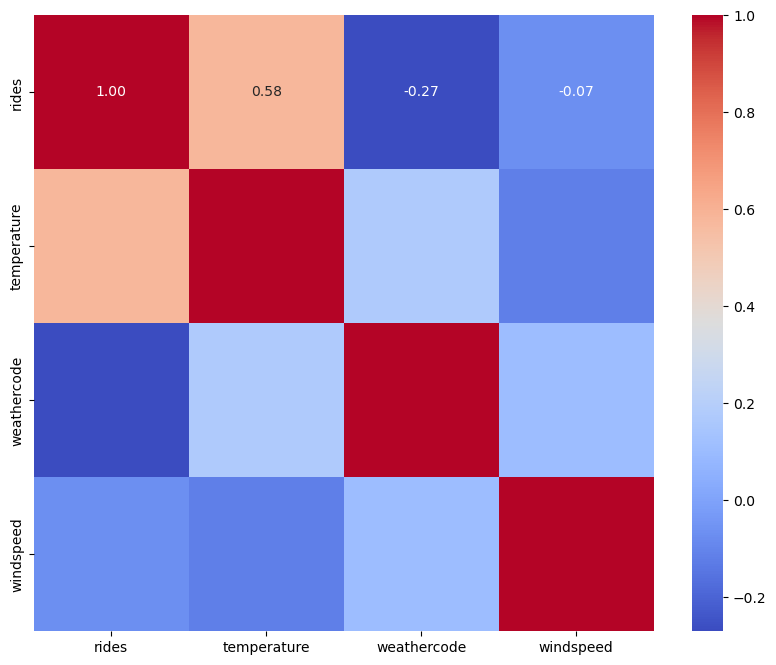

In [326]:


import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = df_weather_select.corr()


plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## linear Regression with temperature/ weathercode/ windspeed

In [328]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming df_weather_select is your original DataFrame
# One-hot encode 'weathercode' and concatenate with 'temperature' and 'windspeed'
weathercode_dummies = pd.get_dummies(df_weather_select['weathercode'], prefix='weathercode')
X = pd.concat([df_weather_select[['temperature', 'windspeed']], weathercode_dummies], axis=1)
y = df_weather_select['rides']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)

print(f"The R^2 score of the multiple regression model is: {score:.2f}")

# If you need to make predictions:
# predictions = model.predict(X_test)



The R^2 score of the multiple regression model is: 0.52


## Random Forest Regressor with temperature/ weathercode/ windspeed

In [329]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100,  # Number of trees in the forest
                                 random_state=0,    # Seed for reproducibility
                                 n_jobs=-1)         # Use all CPUs for faster training

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate the model
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Training R^2 score: {train_r2:.2f}")
print(f"Test R^2 score: {test_r2:.2f}")
print(f"Training MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

# Optional: Feature Importance
feature_importances = rf_model.feature_importances_
features = X_train.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)


Training R^2 score: 0.94
Test R^2 score: 0.50
Training MSE: 1068377.29
Test MSE: 9358782.57
           Feature  Importance
0      temperature    0.614733
1        windspeed    0.187038
10  weathercode_63    0.061872
9   weathercode_61    0.031492
3    weathercode_1    0.020611
2    weathercode_0    0.016279
7   weathercode_53    0.015443
8   weathercode_55    0.013204
5    weathercode_3    0.010455
4    weathercode_2    0.010253
6   weathercode_51    0.009139
11  weathercode_65    0.003715
14  weathercode_75    0.002821
13  weathercode_73    0.002269
12  weathercode_71    0.000676
